# Unupervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # method to check number of clusters along with elbow rule
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch # cluster hierarchy to plot dendogram
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
#import dataset
data= pd.read_csv('Wholesale_Data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


##### this is from the kaggle dataset to get an idea of what are the categories in the columns of the data and get more information on that can help understand it better 

##### Channel - Horeca (Hotel/Restaurant/Cafe or Retail channel (Nominal)

##### Regions - Lisnon, Oporto or Other (Nominal)

###### It includes the annual spending in monetary units (m.u.) on diverse product categories
###### deli is a shortened form, or common nickname, of delicatessen

In [3]:
#check size od data
data.shape

(440, 8)

In [4]:
#generate statistical summary
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
#check if any null values are present
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
#check zero values
(data==0).sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
#to check for correlation between columns
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


#### From the above we can conclude that there are some columns that have a higher relation with other columns highest one being the relation between grocery and detergents_paper, which is very close to 1. lets look at a visual correlation map below

#### Since Channel and Region are mostly catergorical data encoded as numeric we can cahnge its data type to string  drop those columns for heat map so that we can concentrate only on numerical columns

In [8]:
columns_to_convert = ['Channel','Region']
data[columns_to_convert]=data[columns_to_convert].astype(str)
#verify the change
data.dtypes

Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicassen           int64
dtype: object

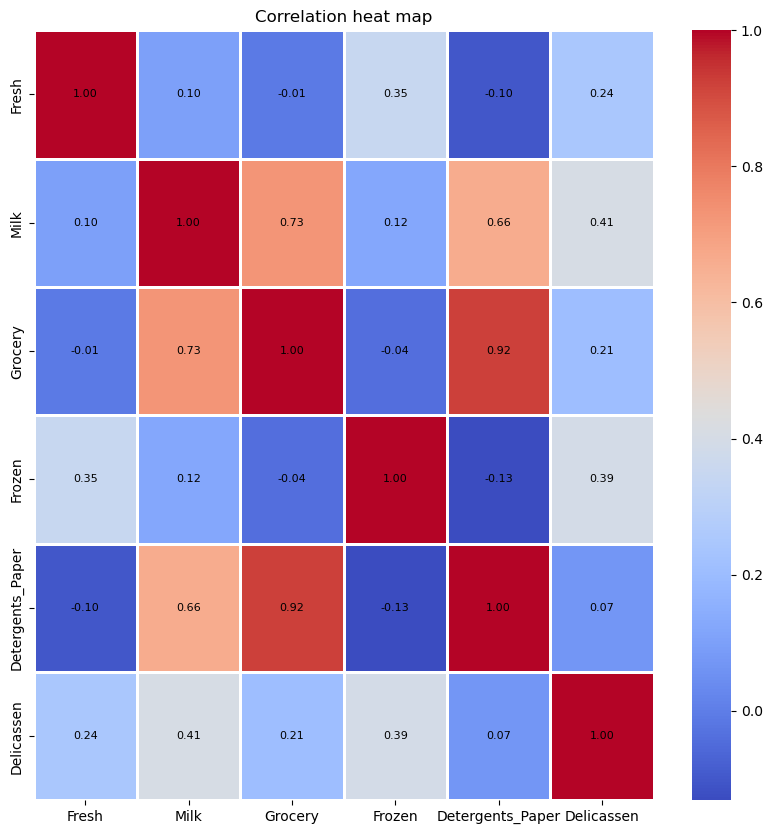

In [9]:
#create new data for heat map with only numeric features
numeric_data=data.select_dtypes(include='number')
corr=numeric_data.corr()

#plot heat map
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm',linewidth=0.8)

# Add annotations for all squares
for i in range(len(corr)):
    for j in range(len(corr.columns)):
        plt.text(j+0.5, i+0.5, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', fontsize=8) 

plt.title('Correlation heat map')
plt.show()



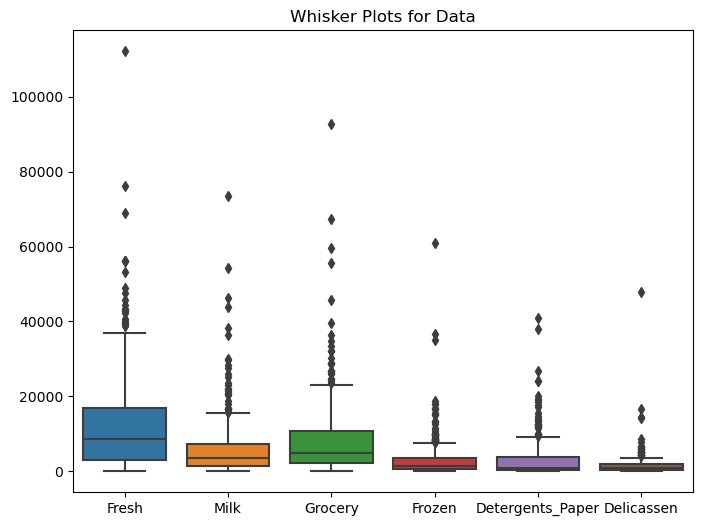

In [10]:
# check for outliers
#plot whisker plot to give an idea on outliers

plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title('Whisker Plots for Data')
plt.show()

##### From the above visualization we can see that almost all of the columns have some drastic values for the spendings in each of the product categories.At this time I am using the technique of capping to convert the extreme outliers to its next highest value in the data column in an effort to offset the effect but at the same time not reduce the data points as this is a small data set to begin with

In [11]:
upper_limits = {'Fresh': 75000, 'Milk': 57000, 'Grocery': 70000, 
                'Frozen': 35000, 'Detergents_Paper': 40000, 'Delicassen': 20000}

# Perform capping for each column
for column, limit in upper_limits.items():
    data[column] = data[column].apply(lambda x: min(x, limit) if x > limit else x)# only change values if it is an outlier past the upperlimits specified

In [12]:
# Save the capped dataset to a new CSV file
#data.to_csv('wholesale_capped.csv', index=False)

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [13]:
df_columns=data.iloc[:,-6:]
X=df_columns
#standardize columns
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

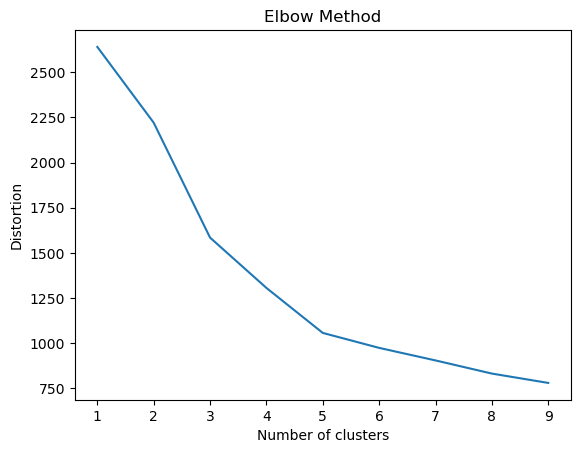

In [25]:
#elbow rule 

distortion=[]
for i in range(1, 10):  # Checking for 1 to 10 clusters
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X_scaled)
        distortion.append(kmeans.inertia_)
    
plt.plot(range(1, 10), distortion)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
warnings.filterwarnings('ignore') # to igonore warnings generated
plt.show()

#### From the above visualization we can see that either 3 or 5 for the number of clusters could be a optimal option but as we cannot find anything definative we can verify with the silhouette score to get the right result

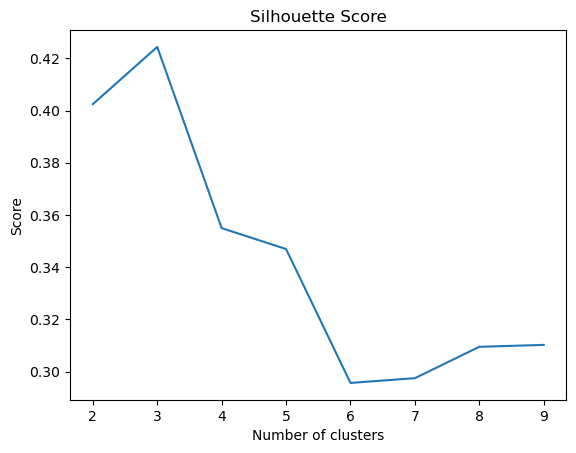

In [15]:
#sillhoute score to verify the number of clusters 
#highest score displays the best option for the  number of clusters
scores = []
for i in range(2, 10):  # silhouette score isn't defined for a single cluster
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X_scaled)
        score = silhouette_score(X_scaled, kmeans.labels_)
        scores.append(score)
    
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
warnings.filterwarnings('ignore') # to igonore warnings generated
plt.show()


#### The highest silhouette score can be seen for 3 clusters thus verifying our result from the elbow rule. 3 clusters should be able to give us a good model

#### As the data set only consists of 440 rows, I am using cross validation and tuning it to silhouette score to improve the model.performing multiple splits will help with the consistency of the resulting clusters

In [16]:
#fit the model with 3 clusters

km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

# fit and predict
y_km = km.fit_predict(X_scaled)


In [17]:
y_km.shape # gives you which cluster each row of the column belongs to 

(440,)

In [18]:
avg_silhouette_score=silhouette_score(X_scaled, y_km)
print(avg_silhouette_score)

0.4774765193605236


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

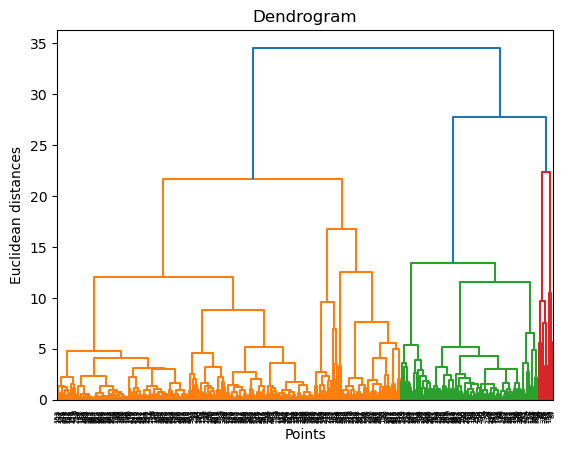

In [19]:
# plot_dendrogram function to find the number of clusters

dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.xlabel('Points')
plt.show()

#### From the above dendogram we can see that the optimal number of clusters is 4 we can use this to perform agglomerative clustering

In [20]:
# create an object
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = 4)
y_hc = ac.fit_predict(X_scaled)

In [21]:
avg_silhouette_score_hc=silhouette_score(X_scaled, y_hc)
print(avg_silhouette_score_hc)

0.3036793812205607


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [32]:
pca = PCA(n_components=None)
pca1=pca.fit(X_scaled) #object pca to access its attributes
X_pca = pca.fit_transform(X_scaled)

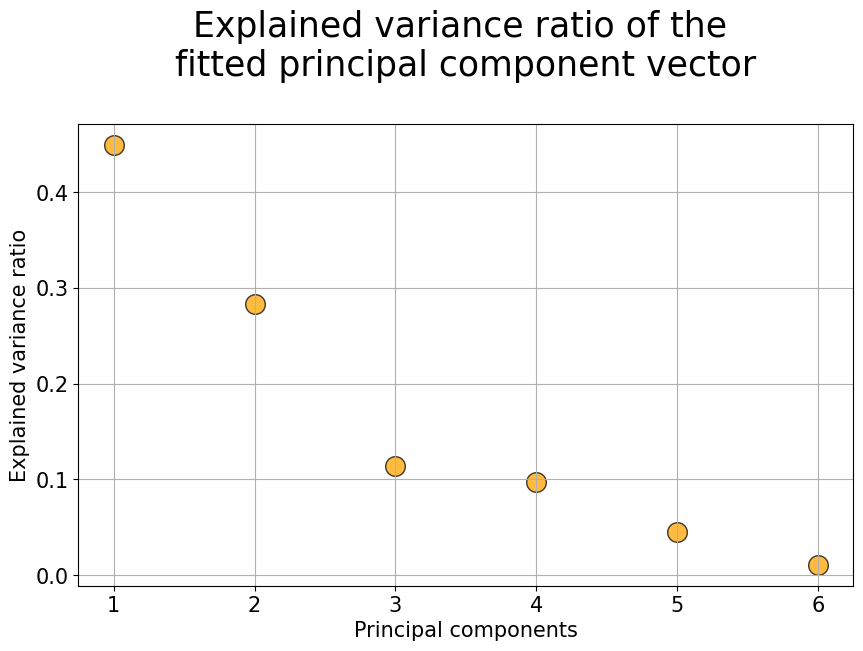

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca1.explained_variance_ratio_))],
            y=pca1.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(pca1.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

#### We can see that PC1 and PC2 best caputures variance of almost 70% after dimentionality reduction but fort he purpose of this assignement I have plotted for 2 and 3 components to visualize the clustering pattern. 

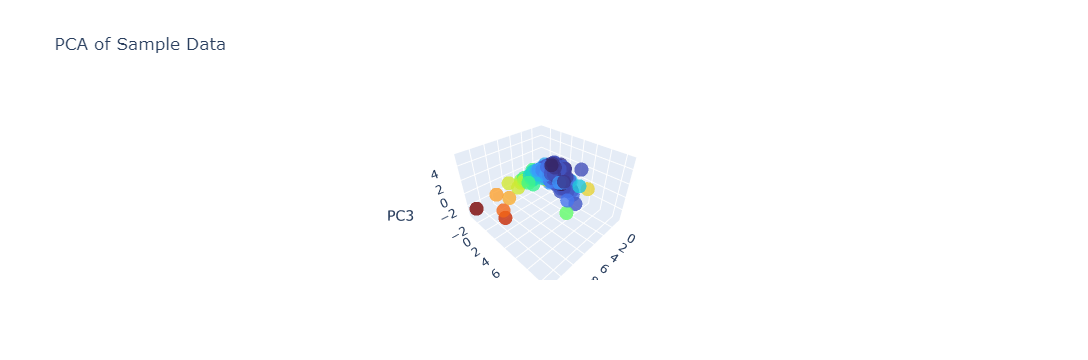

In [36]:
pca3 = PCA(n_components=3)  # Reduce to 3 dimensions for visualization
X_pca3 = pca3.fit_transform(X_scaled)

# Create a DataFrame for plotting
df = pd.DataFrame(data=X_pca3, columns=['PC1', 'PC2','PC3'])

# Plot using plotly
fig = go.Figure(data=[go.Scatter3d(
    x=df['PC1'],
    y=df['PC2'],
    z=df['PC3'],
    mode='markers',
    marker=dict(
        size=8,
        color=df['PC1'], # Set color to PC1 value for better visualization
        colorscale='Turbo',  
        opacity=0.8
    )
)])
# Update layout
fig.update_layout(
    title='PCA of Sample Data',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    )
)

fig.show()

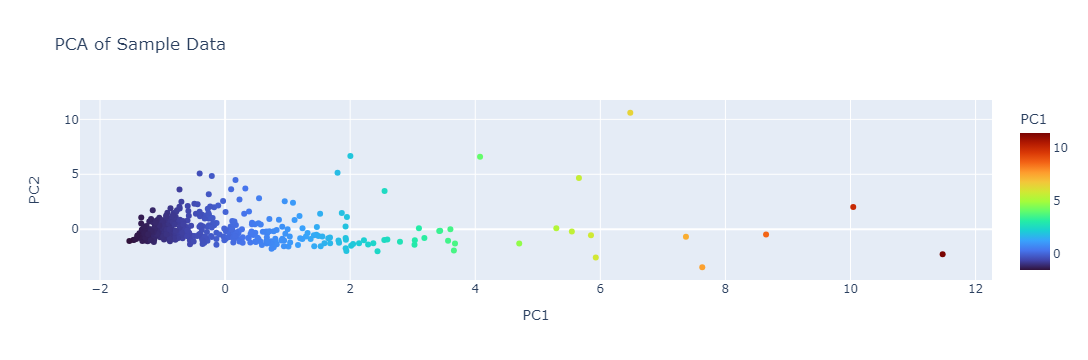

In [38]:
pca2 = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca2 = pca2.fit_transform(X_scaled)

# Create a DataFrame for plotting
df = pd.DataFrame(data=X_pca2, columns=['PC1', 'PC2'])

# Plot using plotly
fig = px.scatter(df, x='PC1', y='PC2',color=df['PC1'], color_continuous_scale='Turbo',title='PCA of Sample Data')
fig.show()

#### Although we can visualize the clusters since we have reduced its dimentionality and PC1,PC2,PC3 together captures the most variance of almost 80% of the data set PCA is not the best model to provide us more insight on the clusters formed as at some level information relating to the original features is lost during this process 

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1) This data set was fairly clean with no missing values however outliers played a part during the EDA proces and with respect to the size of this data set ommision of those data point was not going to be helpful hence I proceeded with the method of capping to preserve the data point and off set some of the effects it may have caused by keeping it at its original value.

2) PCA allows use to visualize the clusters better by reducing the dimensions down, but it is hard to interpret it as it transforms the original set of features into a new set of orthogonal components. but i can give us and idea to explore the model with other options.

3) Different models can tend to produce different optimal clusters but they would generally similar. From the above models we can see that with this data set for Wholesale the Kmeans clustering gave us a better model with a silhouette score just under 50%.

4) Various scores can be used to verify and asses the performance of the model.For this assginment I decided to stick with silhouette score.